<a href="https://colab.research.google.com/github/hohosznta/predictpopulation/blob/main/ARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 분야 1 | 무선 기지국 장비의 통계 데이터를 활용한 인구 밀집도 예측

# 아래의 코드는 다음과 같은 순서로 구성되어 있습니다.
# 1. 데이터 로드 및 전처리
# 2. 모델 학습 및 예측
# 3. 결과 제출
# 본 코드는 결과물 제출까지의 이해를 돕기위한 코드로, 반드시 이 구조를 따를 필요는 없습니다.
# 데이터 전처리, 모델의 구성 등에서 다양한 시도를 하시되, 올바른 채점을 위한 최종 결과물의 형태에 유의하시기 바랍니다.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd

train_df = pd.read_csv("/content/drive/MyDrive/Q1_data/Q1_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Q1_data/Q1_test.csv")

train_df.fillna(method='bfill', inplace=True)
test_df.fillna(method='bfill', inplace=True)

In [ ]:
# 1. 데이터 로드 및 전처리
import pandas as pd
from sklearn.model_selection import train_test_split


def ppr_data2(df):
    # TODO: 데이터 전처리 코드 구현 ---------- #
    # TODO: 데이터 전처리 코드 구현 ---------- #
    columns_to_save = ['scgfail', 'scgfailratio', 'erabaddatt', 'erabaddsucc',
               'endcaddatt', 'endcaddsucc', 'endcmodbymenbatt', 'endcmodbymenbsucc',
               'endcmodbysgnbatt', 'endcmodbysgnbsucc','datetime', 'ru_id']
    columns_to_drop = [col for col in df.columns if col not in columns_to_save]
    x_df_drop = df.drop(columns=columns_to_drop)

    df_B = x_df_drop[df['ru_id'] == 'BaseStationB']
    df_J = x_df_drop[df['ru_id'] == 'BaseStationJ']
    df_B.set_index('datetime', inplace=True)
    df_J.set_index('datetime', inplace=True)


    df_B_revised = df_B.drop(['ru_id'], axis = 1)
    df_J_revised = df_J.drop(['ru_id'], axis = 1)

    return df_B_revised,df_J_revised


def ppr_label(df):
    if 'uenomax' in df.columns:
        df = df[['datetime', 'ru_id', 'uenomax']]  # 레이블 추출
        df_pivot = df.pivot_table(index='datetime', columns='ru_id', values='uenomax', fill_value=0)  # 데이터 재구성
    else:
        df_pivot = None  # 테스트 세트의 경우 정답 컬럼 없음
    return df_pivot

final_test_B, final_test_J = ppr_data2(test_df)  # 테스트 세트의 경우 정답 컬럼 없음


In [ ]:
final_test_B

,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,endcmodbysgnbatt,endcmodbysgnbsucc
datetime,,,,,,,,,,
2023-05-19 00:00:00,0,0.0,3,3,3,3,0,0,2,2
2023-05-19 00:05:00,0,0.0,16,16,16,16,0,0,13,13
2023-05-19 00:10:00,0,0.0,15,15,14,14,0,0,4,4
2023-05-19 00:15:00,0,0.0,7,7,6,6,0,0,10,10
2023-05-19 00:20:00,0,0.0,11,11,11,11,0,0,12,12
...,...,...,...,...,...,...,...,...,...,...
2023-07-17 15:30:00,0,0.0,11,11,11,11,3,3,12,12
2023-07-17 15:35:00,0,0.0,6,6,6,6,0,0,7,7
2023-07-17 15:40:00,1,6.7,15,15,14,14,2,2,16,16


In [ ]:
columns_to_save = ['scgfail', 'scgfailratio', 'erabaddatt', 'erabaddsucc',
               'endcaddatt', 'endcaddsucc', 'endcmodbymenbatt', 'endcmodbymenbsucc',
               'endcmodbysgnbatt', 'endcmodbysgnbsucc','uenomax','datetime', 'ru_id']
df=train_df
columns_to_drop = [col for col in df.columns if col not in columns_to_save]
x_df_drop = df.drop(columns=columns_to_drop)

df_A = x_df_drop[df['ru_id'] == 'BaseStationA']
df_C = x_df_drop[df['ru_id'] == 'BaseStationC']
df_D = x_df_drop[df['ru_id'] == 'BaseStationD']
df_E = x_df_drop[df['ru_id'] == 'BaseStationE']
df_F = x_df_drop[df['ru_id'] == 'BaseStationF']
df_G = x_df_drop[df['ru_id'] == 'BaseStationG']
df_H = x_df_drop[df['ru_id'] == 'BaseStationH']
df_I = x_df_drop[df['ru_id'] == 'BaseStationI']

train = pd.concat([df_A,df_C,df_D,df_E,df_F,df_G,df_H,df_I], axis=0)


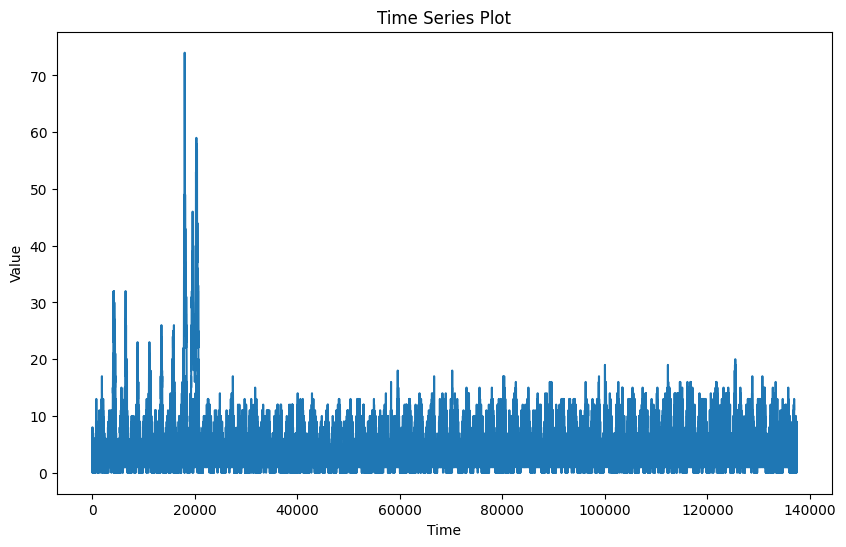

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf

plt.figure(figsize=(10, 6))
plt.plot(train['uenomax'])
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

<ipython-input-8-9df2a66d9b59>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


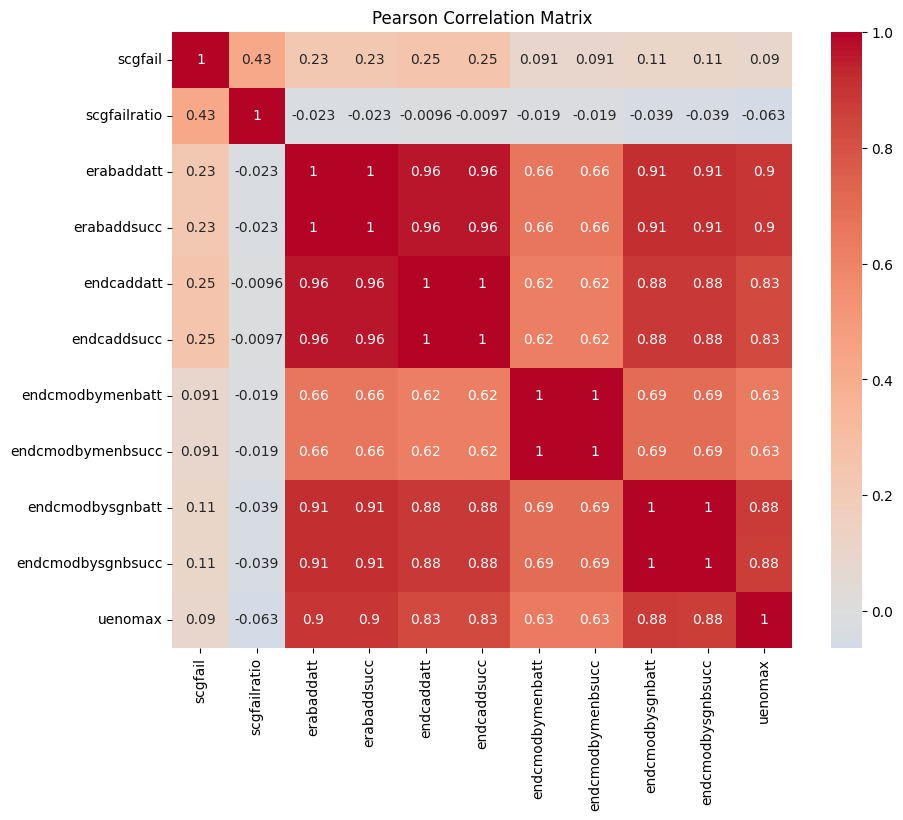

In [ ]:
import seaborn as sns
correlation_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

    columns_to_save = ['scgfail', 'scgfailratio', 'erabaddatt', 'erabaddsucc',
                   'endcaddatt', 'endcaddsucc', 'endcmodbymenbatt', 'endcmodbymenbsucc',
                   'endcmodbysgnbatt', 'endcmodbysgnbsucc','uenomax','datetime', 'ru_id']

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00


In [ ]:
train

,datetime,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,endcmodbysgnbatt,endcmodbysgnbsucc,uenomax
6,2023-05-19 00:00:00,BaseStationA,0,0.0,9,9,5,5,2,2,7,7,1
14,2023-05-19 00:05:00,BaseStationA,1,8.3,12,12,9,9,0,0,15,15,2
22,2023-05-19 00:10:00,BaseStationA,0,0.0,9,9,8,8,4,4,11,11,3
30,2023-05-19 00:15:00,BaseStationA,0,0.0,11,11,10,10,0,0,8,8,2
38,2023-05-19 00:20:00,BaseStationA,0,0.0,9,9,8,8,0,0,9,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137408,2023-07-17 15:30:00,BaseStationI,0,0.0,1,1,1,1,1,1,2,2,1
137416,2023-07-17 15:35:00,BaseStationI,0,0.0,13,13,13,13,2,2,12,12,2
137424,2023-07-17 15:40:00,BaseStationI,1,50.0,2,2,1,1,0,0,0,0,1
137432,2023-07-17 15:45:00,BaseStationI,0,0.0,5,5,5,5,0,0,15,15,2


[
     'erabaddatt', 'erabaddsucc', 'endcaddatt', 'endcaddsucc',
    'endcmodbymenbatt', 'endcmodbymenbsucc', 'endcmodbysgnbatt', 'endcmodbysgnbsucc',
    'connestabatt', 'connestabsucc',  'handoveratt', 'handoversucc',
    'rlculbyte', 'rlcdlbyte', 'totprbulavg', 'totprbdlavg', 'dlreceivedriavg', 'dltransmittedmcsavg',
    'airmaculbyte', 'airmacdlbyte', 'bler_ul', 'bler_dl', 'rachpreamblea', 'numrar', 'nummsg3',
    'attpaging', 'rssipathavg', 'dlreceivedcqiavg', 'uenomax','datetime', 'ru_id']

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create a DataFrame

'''train_f=train.drop(['scgfail', 'scgfailratio', 'erabaddatt', 'erabaddsucc',
               'endcaddatt', 'endcaddsucc', 'endcmodbymenbatt', 'endcmodbymenbsucc',
               'endcmodbysgnbatt', 'endcmodbysgnbsucc','uenomax','datetime', 'ru_id'],axis=1)'''
# Fit ARIMAX model with multiple exogenous variables
# Assume we've already determined the ARIMA orders (p, d, q)
arima_order = (11,1,1)  # Example ARIMA order
#seasonal_order=(6,0,0,228)

# Create the exogenous variable matrix (including a constant column)
exog_vars = sm.add_constant(train[['scgfail', 'scgfailratio', 'erabaddatt', 'erabaddsucc',
               'endcaddatt', 'endcaddsucc', 'endcmodbymenbatt', 'endcmodbymenbsucc',
               'endcmodbysgnbatt', 'endcmodbysgnbsucc']])

# Fit ARIMAX model with multiple exogenous variables
model = sm.tsa.SARIMAX(train['uenomax'], exog=exog_vars, order=arima_order)
results = model.fit()

# Get the model summary
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                uenomax   No. Observations:               137445
Model:              SARIMAX(11, 1, 1)   Log Likelihood             -185672.694
Date:                Fri, 22 Dec 2023   AIC                         371393.387
Time:                        15:35:56   BIC                         371629.330
Sample:                             0   HQIC                        371463.982
                             - 137445                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.328e-09   2.34e-13   2.28e+04      0.000    5.33e-09    5.33e-09
scgfail              -0.0516      0.001    -72.501      0.000      -0.053      -0.050
scgfailratio          0.

In [ ]:
from sklearn.metrics import mean_absolute_error
forecast_steps = 17181
exog_varsb = sm.add_constant(test[['scgfail', 'scgfailratio', 'erabaddatt', 'erabaddsucc',
               'endcaddatt', 'endcaddsucc', 'endcmodbymenbatt', 'endcmodbymenbsucc',
               'endcmodbysgnbatt', 'endcmodbysgnbsucc']])
# Adjust this based on how many steps/periods you want to forecast
forecast_ = results.forecast(steps=17181, exog=exog_varsb)
forecasted = np.where(forecast_ < 0, 0, forecast_)


# 'new_exog_data' is a DataFrame containing exogenous variables for the forecasted periods
# It should have the same structure as the 'exog_vars' used for model fitting
print("Forecasted values:")
print(forecasted)
df_forecast=pd.DataFrame(forecasted)

mae = mean_absolute_error(forecasted, test['uenomax'])
print("Mean Absolute Error:", mae)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasted values:
[1.10156946 1.15946253 1.50654515 ... 1.33366388 1.93280423 1.36409081]
Mean Absolute Error: 0.5649594456449247


In [ ]:
forecast_steps = 17181
exog_varsb = sm.add_constant(final_test_B[['scgfail', 'scgfailratio', 'erabaddatt', 'erabaddsucc',
               'endcaddatt', 'endcaddsucc', 'endcmodbymenbatt', 'endcmodbymenbsucc',
               'endcmodbysgnbatt', 'endcmodbysgnbsucc']])
# Adjust this based on how many steps/periods you want to forecast
forecast_ = results.forecast(steps=17181, exog=exog_varsb)
forecasted_B = np.where(forecast_ < 0, 0, forecast_)


# 'new_exog_data' is a DataFrame containing exogenous variables for the forecasted periods
# It should have the same structure as the 'exog_vars' used for model fitting
print("Forecasted values:")
print(forecasted_B)
B_df_forecast=pd.DataFrame(forecasted_B)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasted values:
[1.27992966 2.40252282 2.0565745  ... 2.49160737 3.01863605 3.08011484]


In [ ]:
forecast_steps_J = 17181
exog_varsj = sm.add_constant(final_test_J[['scgfail', 'scgfailratio', 'erabaddatt', 'erabaddsucc',
               'endcaddatt', 'endcaddsucc', 'endcmodbymenbatt', 'endcmodbymenbsucc',
               'endcmodbysgnbatt', 'endcmodbysgnbsucc']])
# Adjust this based on how many steps/periods you want to forecast
 # Adjust this based on how many steps/periods you want to forecast
forecast_J_ = results.forecast(steps=17181, exog=exog_varsj)
#forecast_J = np.where(forecast_J_ < 0, 0, forecast_J_)
# 'new_exog_data' is a DataFrame containing exogenous variables for the forecasted periods
# It should have the same structure as the 'exog_vars' used for model fitting
print("Forecasted values:")
print(forecast_J_)
J_df_forecast=pd.DataFrame(forecast_J_)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasted values:
120264    1.348070
120265    1.394870
120266    1.401695
120267    1.560518
120268    1.977024
            ...   
137440    2.520082
137441    1.647373
137442    1.851532
137443    1.523465
137444    2.026362
Name: predicted_mean, Length: 17181, dtype: float64



     ['erabaddatt', 'erabaddsucc', 'endcaddatt', 'endcaddsucc',
    'endcmodbymenbatt', 'endcmodbymenbsucc', 'endcmodbysgnbatt', 'endcmodbysgnbsucc',
    'connestabatt', 'connestabsucc',  'handoveratt', 'handoversucc',
    'rlculbyte', 'rlcdlbyte', 'totprbulavg', 'totprbdlavg', 'dlreceivedriavg', 'dltransmittedmcsavg',
    'airmaculbyte', 'airmacdlbyte', 'bler_ul', 'bler_dl', 'rachpreamblea', 'numrar', 'nummsg3',
    'attpaging', 'rssipathavg', 'dlreceivedcqiavg']

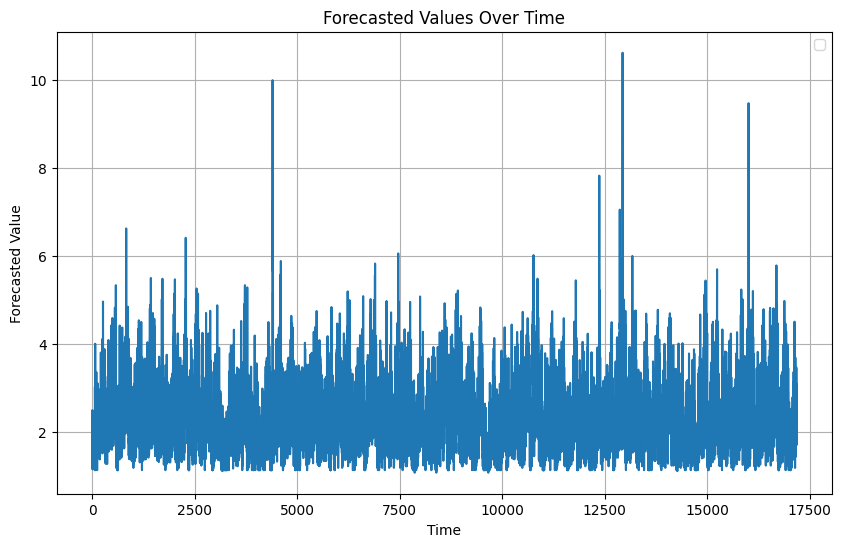

In [ ]:
import matplotlib.pyplot
# Assuming you have the forecasted values and their indices as forecast_df


# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(forecasted_B)
plt.xlabel('Time')
plt.ylabel('Forecasted Value')
plt.title('Forecasted Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
label = pd.read_csv("/content/drive/MyDrive/Q1_data/Q1_label_sample.csv")


In [ ]:
new_df = pd.DataFrame({
    'BaseStationB': forecasted_B,
    'BaseStationJ': forecast_J_
})

# Add an index that goes from 0 to len(forecast_values1)
new_df['index'] = range(17181)

# Set the new index to be the 'index' column
new_df.set_index('index', inplace=True)

# Display the new DataFrame
print(new_df)



new_df

       BaseStationB  BaseStationJ
index                            
0          1.279930      1.348070
1          2.402523      1.394870
2          2.056575      1.401695
3          1.861561      1.560518
4          2.161971      1.977024
...             ...           ...
17176      2.180531      2.520082
17177      1.691425      1.647373
17178      2.491607      1.851532
17179      3.018636      1.523465
17180      3.080115      2.026362

[17181 rows x 2 columns]


,BaseStationB,BaseStationJ
index,,
0,1.279930,1.348070
1,2.402523,1.394870
2,2.056575,1.401695
3,1.861561,1.560518
4,2.161971,1.977024
...,...,...
17176,2.180531,2.520082
17177,1.691425,1.647373
17178,2.491607,1.851532


In [ ]:
datetime_series=label['datetime']


In [ ]:
new_df = pd.concat([datetime_series, new_df], axis=1)

# Display the new DataFrame
print(new_df)

                  datetime  BaseStationB  BaseStationJ
0      2023-05-19 00:00:00      1.279930      1.348070
1      2023-05-19 00:05:00      2.402523      1.394870
2      2023-05-19 00:10:00      2.056575      1.401695
3      2023-05-19 00:15:00      1.861561      1.560518
4      2023-05-19 00:20:00      2.161971      1.977024
...                    ...           ...           ...
17176  2023-07-17 15:30:00      2.180531      2.520082
17177  2023-07-17 15:35:00      1.691425      1.647373
17178  2023-07-17 15:40:00      2.491607      1.851532
17179  2023-07-17 15:45:00      3.018636      1.523465
17180  2023-07-17 15:50:00      3.080115      2.026362

[17181 rows x 3 columns]


In [ ]:
# 3. 결과 제출
# 본 코드는 제출되는 파일의 형태에 대한 가이드로, 반드시 아래 구조를 따를 필요 없이 자유롭게 코드를 작성해도 무방합니다.
# 제출 포맷에 대해서는 data/Q1_label_sample.csv를 참조하세요.
#
# 분야 1의 제출 파일은 3개 컬럼 [datetime, BaseStationB, BaseStationJ]을 가져야 합니다.
# 각 샘플은 시간 정보, BaseStationB의 uenomax, BaseStationJ의 uenomax 값을 가져야 합니다.

def submitResult(pred):
    try:
        label = pd.read_csv("/content/drive/MyDrive/Q1_data/Q1_label_sample.csv")
        # 1. 컬럼명과 순서가 동일한지 체크
        if pred.columns.equals(label.columns):
            print("Check: 컬럼명과 순서가 동일합니다.")
        else:
            print(f"Warning: 컬럼명과 순서가 동일하지 않습니다.\n- 예측 데이터프레임 컬럼명: {pred.columns}\n- 레이블 데이터프레임 컬럼명: {label.columns}")
            return

        # 2. datetime 컬럼이 존재하며 해당 컬럼의 샘플수와 값이 일치하는지 체크
        if (label['datetime'] == pred['datetime']).all():
            print("Check: datetime 순서와 샘플 수가 일치합니다.")
        else:
            print("Warning: 테스트 세트와 모델 예측의 datetime이 일치하지 않습니다.")
            return

        pred.to_csv('Q1_submitResult.csv', index=False)
        print("Done : Q1_submitResult.csv 파일로 저장되었습니다.")
    except Exception as e:
        # 예외가 발생한 경우 오류 메시지 출력
        print("Error:", e)

submitResult(new_df)

Check: 컬럼명과 순서가 동일합니다.
Check: datetime 순서와 샘플 수가 일치합니다.
Done : Q1_submitResult.csv 파일로 저장되었습니다.
